In [1]:
import pandas as pd
import numpy as np

In [2]:
X_train = np.load('../data/processed/X_train.npy')
X_val = np.load('../data/processed/X_val.npy' )
y_train = np.load('../data/processed/y_train.npy' )
y_val = np.load('../data/processed/y_val.npy', )
X_test = np.load('../data/processed/X_test.npy')

In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
lr_model = LogisticRegression(solver='liblinear', random_state=7)

In [5]:
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=7, solver='liblinear')

In [6]:
#Save model in the models folder
from joblib import dump
dump(lr_model, '../models/logistic_regression_default.joblib')

['../models/logistic_regression_default.joblib']

In [7]:
y_trainpreds = lr_model.predict(X_train)
y_val_preds = lr_model.predict(X_val)

In [8]:
#Get error/score metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [9]:
print(mse(y_val, y_val_preds, squared=False))
print(mae(y_val, y_val_preds))

0.41306779104645763
0.170625


In [10]:
lr_model.score(X_train, y_train)

0.8365625

In [11]:
lr_model.score(X_val, y_val)

0.829375

In [12]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

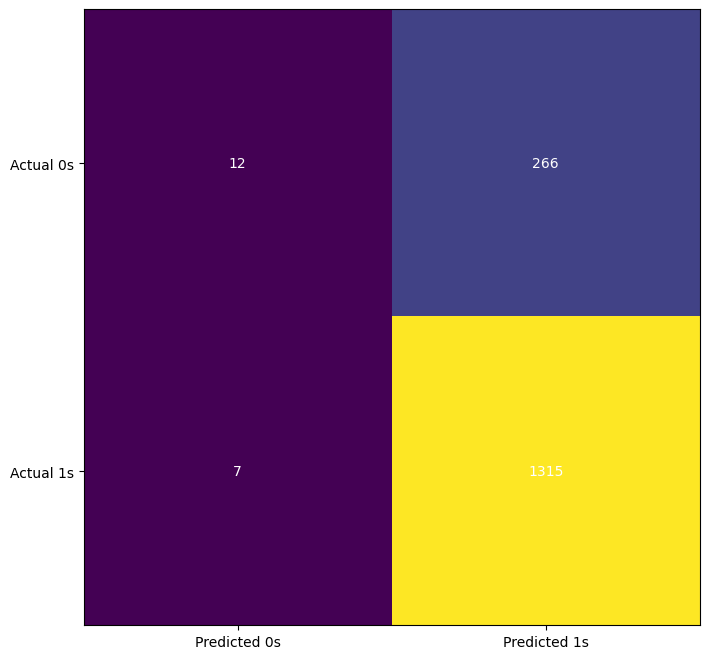

In [13]:
cm = confusion_matrix(y_val, y_val_preds)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()